In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
from utils import *
from sklearn.model_selection import StratifiedKFold

In [98]:
df=loadData(quant=True,unSkew=True,remCols=3)
X = df.drop(columns=['price'])
Y = df['price']
kf = StratifiedKFold(n_splits=10, shuffle=False)

/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [99]:
X.shape

(53940, 6)

In [100]:
from utils import *
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

In [101]:
type(df['price'].apply(np.log)[4])

numpy.float64

In [102]:
from yellowbrick.regressor import CooksDistance
from yellowbrick.datasets import load_concrete

In [103]:
from scipy.special import boxcox, inv_boxcox

/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


---------------------------------------------------------

Num Columns Removed: 0



/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


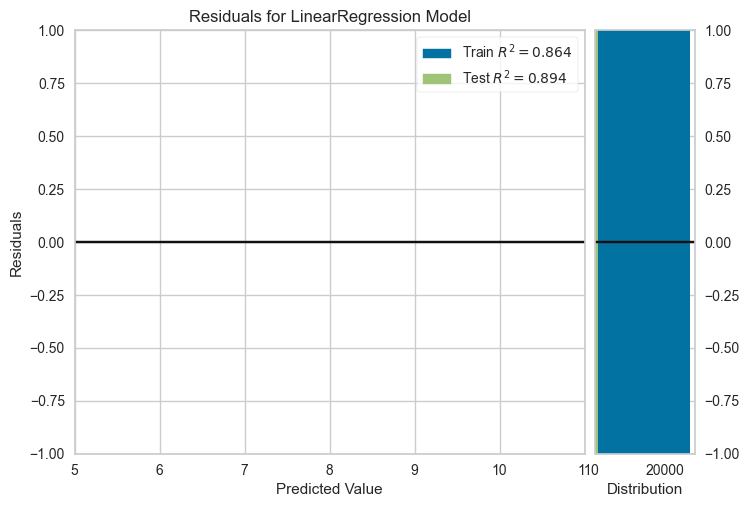

Split Training RSME: 1470.3053812173166 Testing RSME 1301.6342004806972,                    ev = 0.9396905195816191



/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


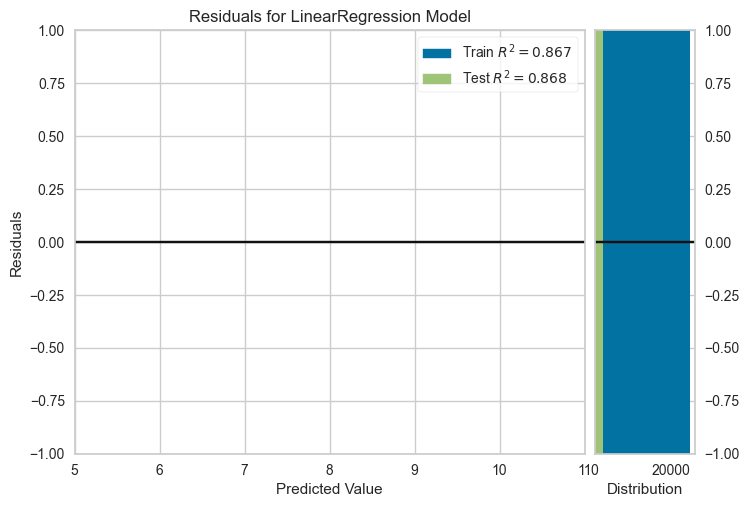

Split Training RSME: 1454.6548161508238 Testing RSME 1449.671171636661,                    ev = 0.9396905195816191



/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


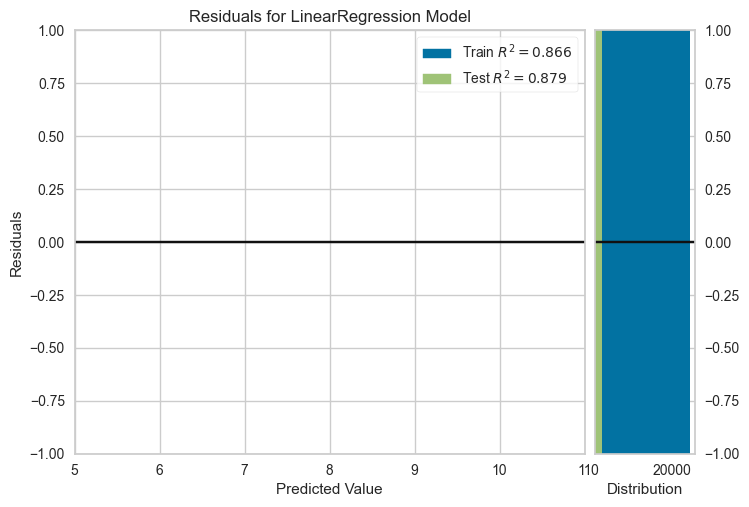

Split Training RSME: 1461.060300076772 Testing RSME 1390.7512064631424,                    ev = 0.9396905195816191



/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


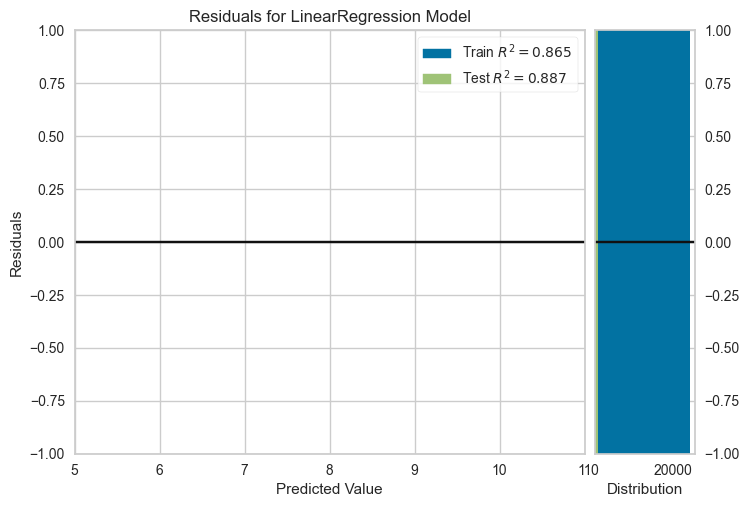

Split Training RSME: 1466.8468178332955 Testing RSME 1339.6389445735458,                    ev = 0.9396905195816191



/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


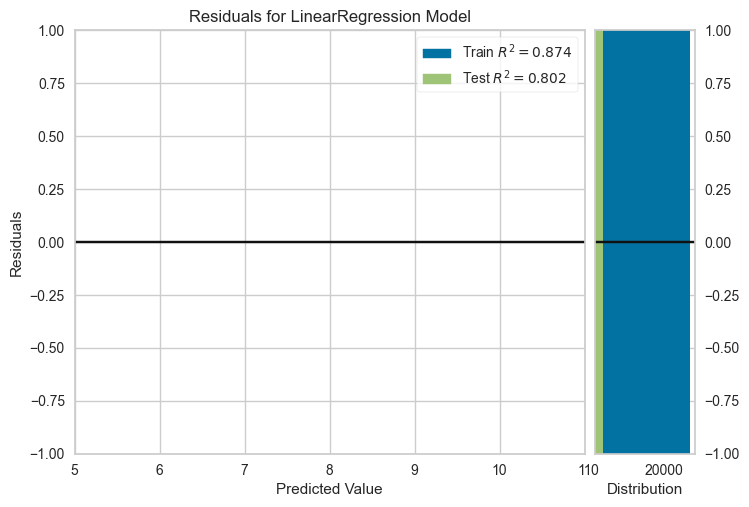

Split Training RSME: 1417.8614329608818 Testing RSME 1773.7469003540969,                    ev = 0.9396905195816191



/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


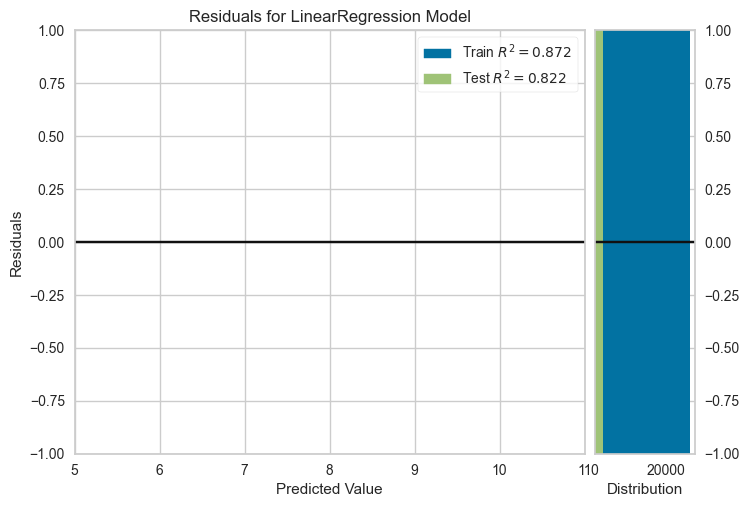

Split Training RSME: 1427.7630836930882 Testing RSME 1680.5943910605833,                    ev = 0.9396905195816191



/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


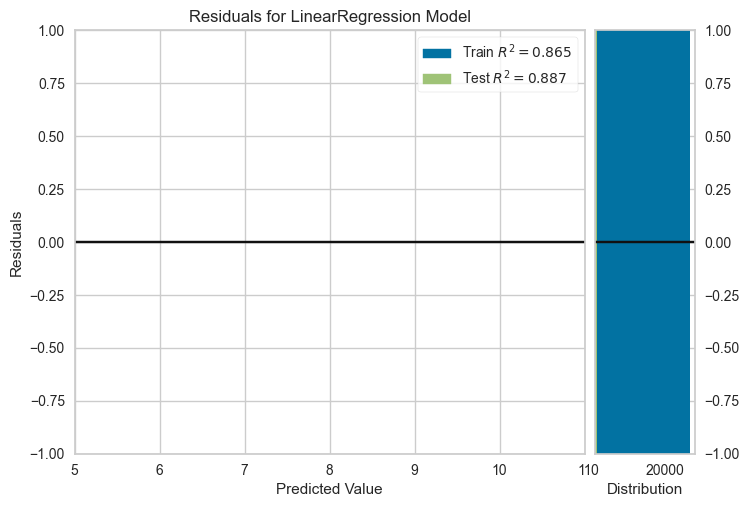

Split Training RSME: 1466.352337980427 Testing RSME 1341.0665180625108,                    ev = 0.9396905195816191



/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


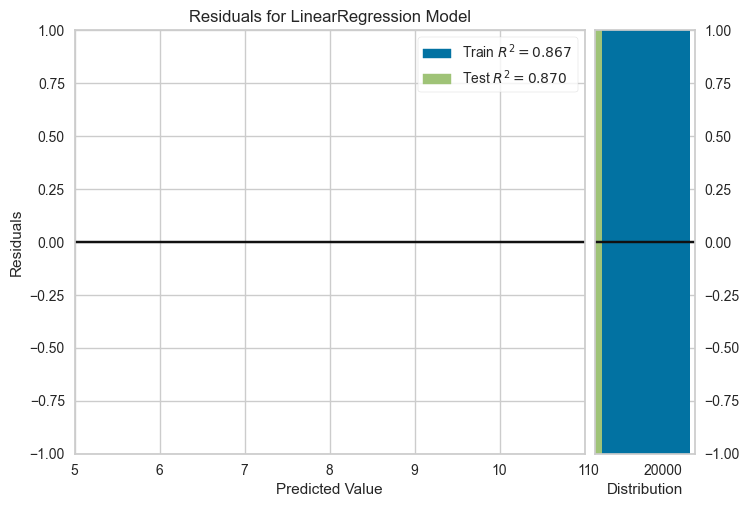

Split Training RSME: 1455.6876047485687 Testing RSME 1438.8008818657272,                    ev = 0.9396905195816191



/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


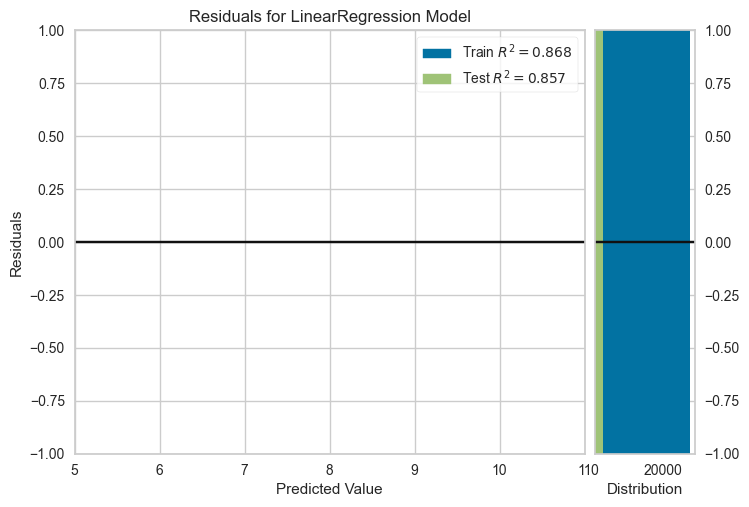

Split Training RSME: 1447.6996475023227 Testing RSME 1509.9010259169727,                    ev = 0.9396905195816191



/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


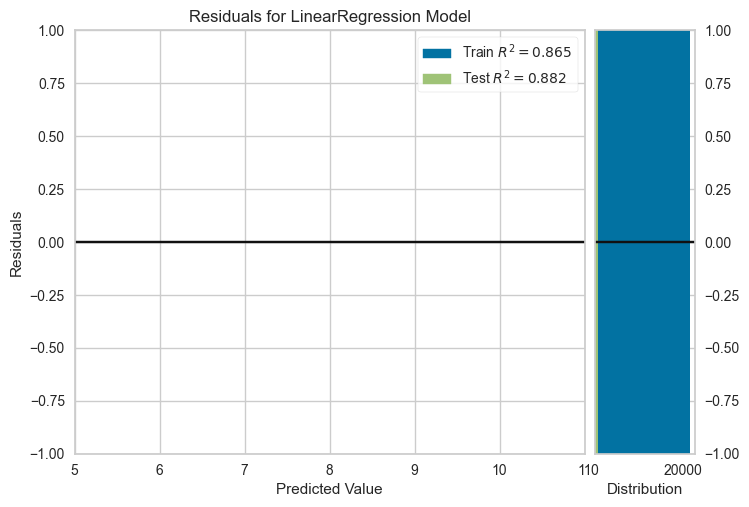

Split Training RSME: 1463.7040799734089 Testing RSME 1369.3047190372763,                    ev = 0.9396905195816191

Mean TrainRSME = 1453.1935502136905

Mean TestRSME = 1459.5109959451215



In [110]:
remColsGrid = [0]
residuals = []
kf = StratifiedKFold(n_splits=10, shuffle=False)
totResiduals = []
for remColParam in remColsGrid:
    df=loadData(quant=True,unSkew=True,remCols=remColParam)
    X = df.drop(columns=['price'])
    Y = df['price']
    
    totalTrainRSME = 0
    totalTestRSME = 0
    print("---------------------------------------------------------\n")
    print(f"Num Columns Removed: {remColParam}\n")
    for train_index, test_index in kf.split(X, Y.to_numpy()):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = np.log(Y.iloc[train_index]), np.log(Y.iloc[test_index])
        # y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        X_train, X_test = scaleTrainTest(X_train, X_test)

        reg = LinearRegression().fit(X_train,y_train)

        fig,axs = plt.subplots(1)
        axs.set_title('log Residuals for Linear Regression')
        axs.set_ylim(bottom=-1,top=1)
        axs.set_xlim(left=5, right=11)

        visualizer = ResidualsPlot(reg, ax=axs, train_alpha=0.01, test_alpha=0.05)
        visualizer.fit(X_train, y_train)
        visualizer.score(X_test,y_test)
        visualizer.show()


        # trainPred = reg.predict(X_train)
        # testPred = reg.predict(X_test)
        # trainRSME = mean_squared_error(trainPred, y_train, squared=False)
        # testRSME = mean_squared_error(testPred, y_test, squared=False)

        trainPred = np.exp(reg.predict(X_train))
        testPred = np.exp(reg.predict(X_test))
        

        trainRSME = mean_squared_error(trainPred,np.exp(y_train), squared=False)
        explainedvar = explained_variance_score(trainPred, np.exp(y_train))
        testRSME = mean_squared_error(testPred, np.exp(y_test), squared=False)

        print(f"Split Training RSME: {trainRSME} Testing RSME {testRSME},\
                    ev = {explainedvar}\n")
        totalTrainRSME += trainRSME
        totalTestRSME += testRSME
    print(f"Mean TrainRSME = {totalTrainRSME/10}\n")
    print(f"Mean TestRSME = {totalTestRSME/10}\n")

In [106]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

In [107]:
for train_index, test_index in kf.split(X, Y):
    print(f"XTrain: {X.iloc[train_index].shape}, Ytrain: {Y.iloc[train_index].shape}")



/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


XTrain: (48546, 9), Ytrain: (48546,)
XTrain: (48546, 9), Ytrain: (48546,)
XTrain: (48546, 9), Ytrain: (48546,)
XTrain: (48546, 9), Ytrain: (48546,)
XTrain: (48546, 9), Ytrain: (48546,)
XTrain: (48546, 9), Ytrain: (48546,)
XTrain: (48546, 9), Ytrain: (48546,)
XTrain: (48546, 9), Ytrain: (48546,)
XTrain: (48546, 9), Ytrain: (48546,)
XTrain: (48546, 9), Ytrain: (48546,)


In [ ]:
Y.shape

(53940,)

In [ ]:
df = loadData()
df.drop(columns=["Unnamed: 0"],inplace=True)  
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,330,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,327,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,328,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,337,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,338,4.34,4.35,2.75


# Question 1

## 1.1

In [ ]:
#Assigning quantitative values to qualitative features
diamondsDF = df.copy(deep=True)

cutLabels = ["Fair","Good","Very Good", "Premium", "Ideal"]
for i in range(len(cutLabels)):
    diamondsDF['cut'].replace(cutLabels[i],i+1,inplace=True)

clarityLabels = ["I1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF"]
for i in range(len(clarityLabels)):
    diamondsDF['clarity'].replace(clarityLabels[i],i+1,inplace=True)

colorLabels = (list(string.ascii_uppercase[3:10]))
for i in range (len(colorLabels)):
    diamondsDF['color'].replace(colorLabels[i],len(colorLabels)-i,inplace=True)
diamondsDF.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,330,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,327,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,328,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,337,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,338,4.34,4.35,2.75


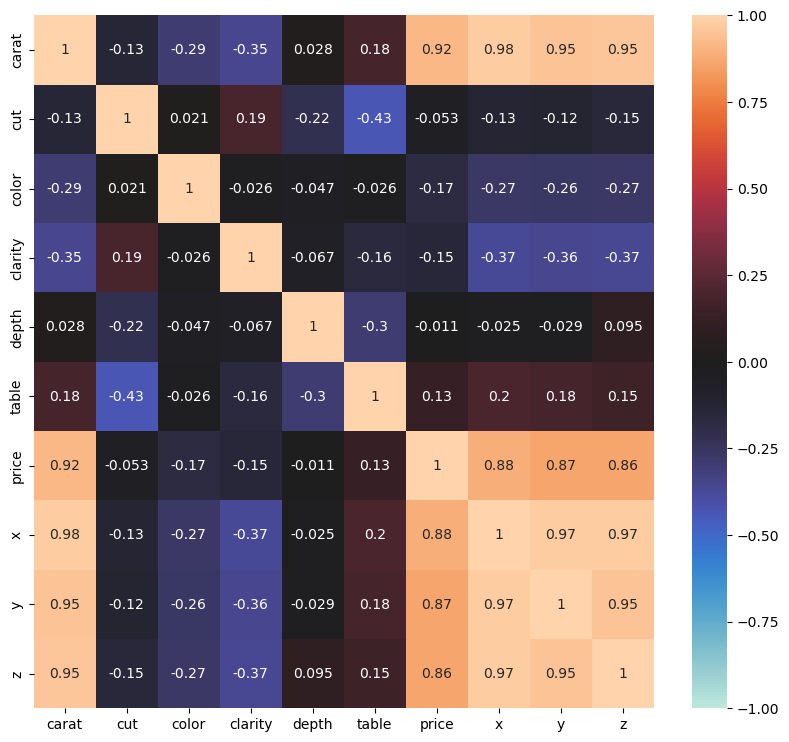

In [ ]:
plt.figure(figsize=(10,9))
corrHeatmap = sns.heatmap(diamondsDF.corr(),vmin=-1,vmax=1,center=0,annot=True)


In [ ]:
diamondsDF.corr()['price'].to_csv("../Figures/Question-1/price_corr_table")
print(diamondsDF.corr()['price'])

carat      0.921591
cut       -0.053493
color     -0.172509
clarity   -0.146802
depth     -0.010648
table      0.127134
price      1.000000
x          0.884436
y          0.865422
z          0.861250
Name: price, dtype: float64


We see by observation that the variable other than **price** that has the highest correlation with the **price** of a diamond is **carat**—the weight of the diamond.  

There is a very positive correlation between the **price** of a diamond and its weight, as well as its size. We know this because **x**,**y**,**z** which refer to the length, width and depth of the diamond,  have very similar positive correlations with **price** of a diamond. **table** has a small positive correlation, meaning it doesn't affect the price of the diamond very much, but it does have a slight positive effect. Finally, **depth** has a correlation near zero, meaning that it has almost no effect on **price**.

Next, let us consider the qualitative features. We see negative covariance values between clarity, 

## 1.2

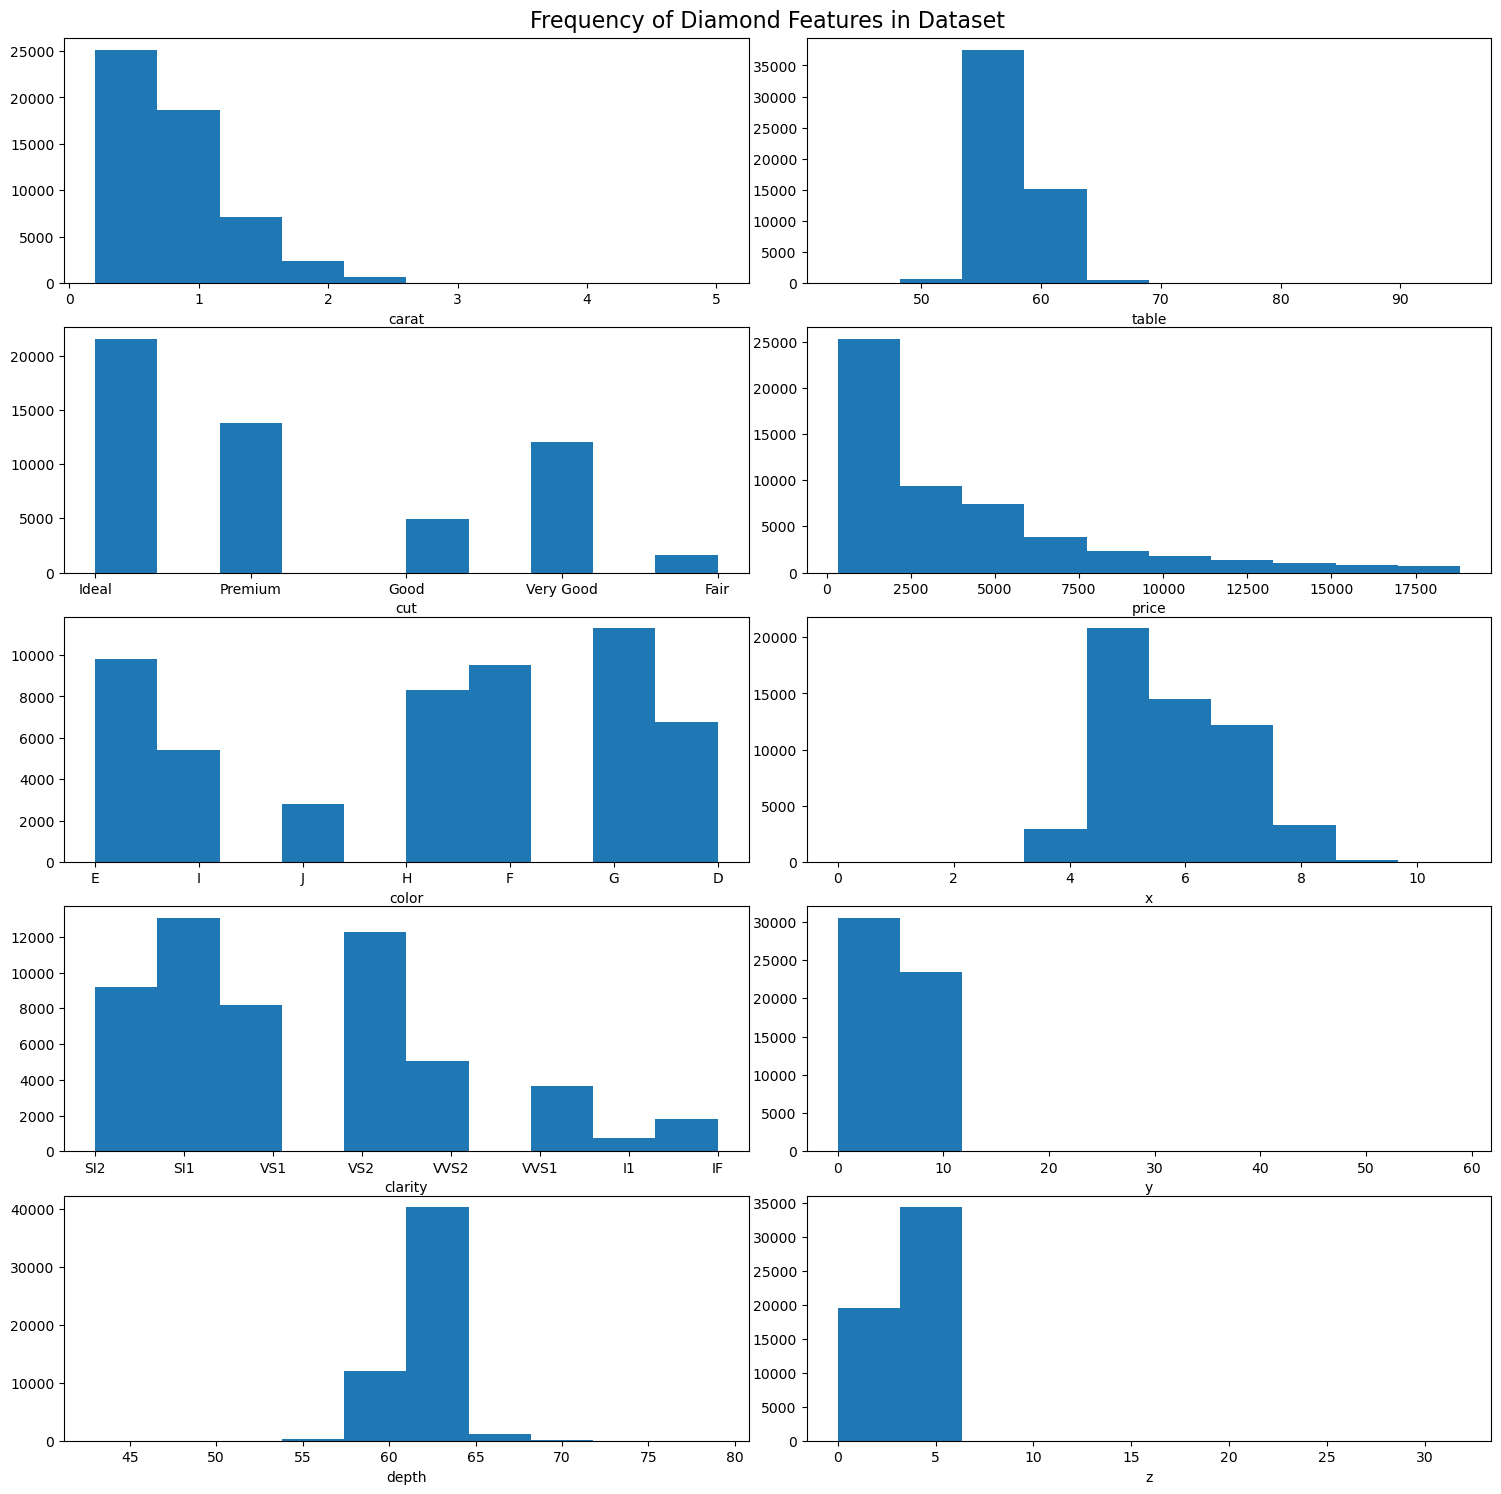

In [ ]:
numRows = len(df.columns)//2
fig, axs = plt.subplots(numRows, 2)
fig.set_figheight(15)
fig.set_figwidth(15)
fig.suptitle("Frequency of Diamond Features in Dataset",fontsize=16)
fig.tight_layout()
i=0
j=0
for x in df.columns:
    if i == numRows:
        j=1
    axs[i-numRows*j,j].hist(df[x])
    axs[i-numRows*j,j].set_xlabel(x)
    i+=1

## 1.3

In [ ]:
from pandas.api.types import CategoricalDtype
import random

<Axes: title={'center': 'price'}, xlabel='clarity'>

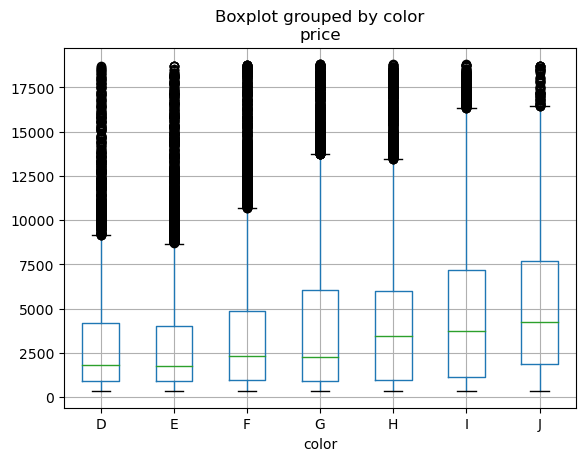

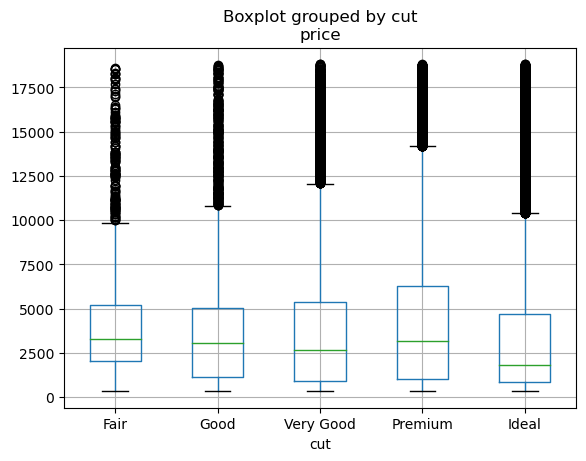

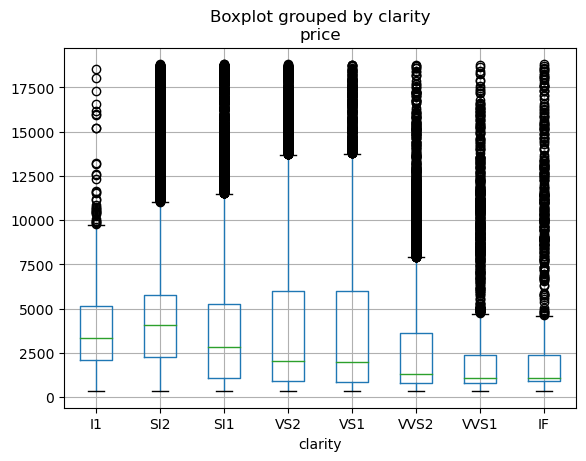

In [ ]:
df.boxplot(column='price',by='color')
cutOrder = CategoricalDtype(cutLabels, ordered=True)
df['cut']=df['cut'].astype(cutOrder)
df.boxplot(column='price',by='cut')
clarityOrder = CategoricalDtype(clarityLabels, ordered=True)
df['clarity'] = df['clarity'].astype(clarityOrder)
df.boxplot(column='price',by='clarity')

# Question 2


## 2.1

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
standardizedDF = pd.DataFrame(scaler.fit_transform(diamondsDF),columns=diamondsDF.columns)
standardizedDF['price']= diamondsDF['price']
standardizedDF.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,-1.198168,0.981473,0.937163,-1.245215,-0.174092,-1.099672,330,-1.587837,-1.536196,-1.571129
1,-1.240361,0.085889,0.937163,-0.638095,-1.360738,1.585529,327,-1.641325,-1.658774,-1.741175
2,-1.198168,-1.705279,0.937163,0.576145,-3.385019,3.375663,328,-1.498691,-1.457395,-1.741175
3,-1.071587,0.085889,-1.414272,-0.030975,0.454133,0.242928,337,-1.364971,-1.317305,-1.287720
4,-1.029394,-1.705279,-2.002131,-1.245215,1.082358,0.242928,338,-1.240167,-1.212238,-1.117674


## 2.2

In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
train, test = train_test_split(standardizedDF, test_size=0.1)

In [ ]:
X_train = train.drop(columns=['price'])
X_test = test.drop(columns=['price'])
y_train = train['price']
y_test = test['price']